In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, RFECV

%matplotlib inline

In [3]:
#TDS Term Deposit sale

tds = pd.read_csv('bank-full.csv')
tds.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
tds.shape

(45211, 17)

In [5]:
tds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
tds.describe(include='object').T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
Target,45211,2,no,39922


In [7]:
tds.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [48]:
tds.pdays[tds.pdays == -1].sum()

-36954

In [9]:
tds.groupby(['Target','marital']).count()

age    job  education  default  balance  housing   loan  \
Target marital                                                               
no     divorced   4585   4585       4585     4585     4585     4585   4585   
       married   24459  24459      24459    24459    24459    24459  24459   
       single    10878  10878      10878    10878    10878    10878  10878   
yes    divorced    622    622        622      622      622      622    622   
       married    2755   2755       2755     2755     2755     2755   2755   
       single     1912   1912       1912     1912     1912     1912   1912   

                 contact    day  month  duration  campaign  pdays  previous  \
Target marital                                                                
no     divorced     4585   4585   4585      4585      4585   4585      4585   
       married     24459  24459  24459     24459     24459  24459     24459   
       single      10878  10878  10878     10878     10878  10878     10878   
yes    divorced      622    622    622       622       622    622       622   
       married      2755   2755   2755      2755      2755   2755      2755   
       single       1912   1912   1912      1912      1912   1912      1912   

                 poutcome  
Target marital             
no     divorced      4585  
       married      24459  
       single       10878  
yes    divorced       622  
       married       2755  
       single        1912

**Observation**

A larger percentage of customers without previous loans said no to the offer 

In [10]:
tds.groupby(['Target','loan']).count()

age    job  marital  education  default  balance  housing  \
Target loan                                                                
no     no    33162  33162    33162      33162    33162    33162    33162   
       yes    6760   6760     6760       6760     6760     6760     6760   
yes    no     4805   4805     4805       4805     4805     4805     4805   
       yes     484    484      484        484      484      484      484   

             contact    day  month  duration  campaign  pdays  previous  \
Target loan                                                               
no     no      33162  33162  33162     33162     33162  33162     33162   
       yes      6760   6760   6760      6760      6760   6760      6760   
yes    no       4805   4805   4805      4805      4805   4805      4805   
       yes       484    484    484       484       484    484       484   

             poutcome  
Target loan            
no     no       33162  
       yes       6760  
yes    no        4805  
       yes        484

In [11]:
tds.groupby('Target').count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
Target,,,,,,,,,,,,,,,,
no,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
yes,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


In [12]:
#This replaces unknown with NaN

tds1 = tds.replace(to_replace='unknown', value=np.NaN, inplace=False)

In [13]:
tds1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [14]:
# A quick check of missing data
tds1.isna().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
Target           0
dtype: int64

**Observation**


About 82% of the data in poutcome, that is, outcome of previous campaign is unknown. This leaves this dataset suspect.
Models will be used to 

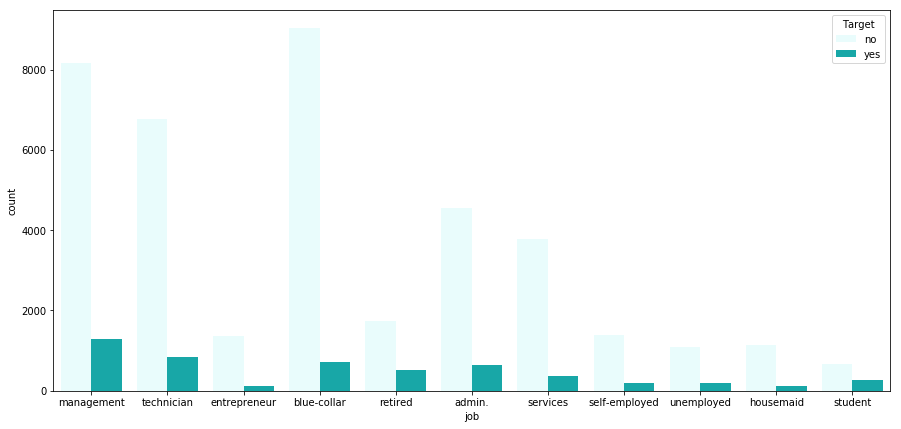

In [47]:
f, ax = plt.subplots(figsize=(15, 7))
ax1 = sns.countplot(x="job", data=tds1, color="c", orient='v', hue='Target' )



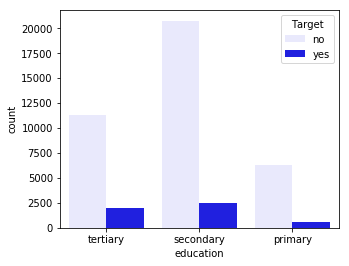

In [51]:
f, ax = plt.subplots(figsize=(5, 4))
sns.countplot(x="education", data=tds1, color="b", orient='h', hue='Target')

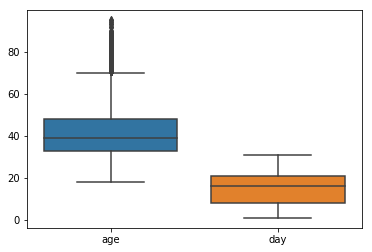

In [15]:
sns.boxplot(data =tds1[['age', 'day']] )

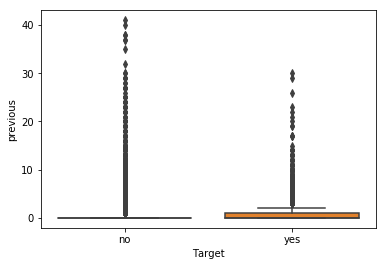

In [16]:
sns.boxplot(x=tds1.Target, y=tds1.previous[tds1.previous<=50], orient='v')

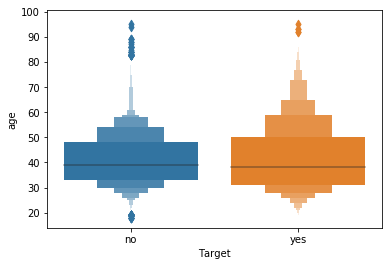

In [17]:
sns.boxenplot(x=tds1.Target, y=tds1.age)


In [19]:
tds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          44923 non-null object
marital      45211 non-null object
education    43354 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      32191 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     8252 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [20]:
colnames = tds1.columns

for col in colnames:
    if tds1[col].dtype == 'object':
        tds1[col] = tds1[col].astype('category')
tds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          44923 non-null category
marital      45211 non-null category
education    43354 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      32191 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     8252 non-null category
Target       45211 non-null category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [21]:
#sns.pairplot(tds1, diag_kind='kde', hue='Target')

In [22]:
tds1.groupby('Target').count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
Target,,,,,,,,,,,,,,,,
no,39922,39668,39922,38317,39922,39922,39922,39922,27432,39922,39922,39922,39922,39922,39922,6349
yes,5289,5255,5289,5037,5289,5289,5289,5289,4759,5289,5289,5289,5289,5289,5289,1903


In [23]:
tds1.groupby(['education', 'contact'])['Target'].count()

education  contact  
primary    cellular      3568
           telephone      722
secondary  cellular     14688
           telephone     1365
tertiary   cellular     10039
           telephone      629
Name: Target, dtype: int64

In [24]:
tds2 = tds1.drop('poutcome', axis=1)
tds2 = tds2.dropna()
tds2.groupby(['education', 'contact'])['Target'].count()

education  contact  
primary    cellular      3549
           telephone      713
secondary  cellular     14648
           telephone     1356
tertiary   cellular     10016
           telephone      625
Name: Target, dtype: int64

In [25]:
tds_corr = tds2.corr()

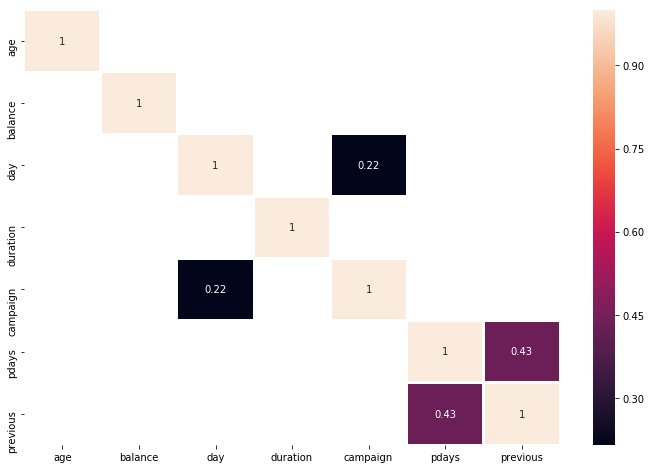

In [26]:
f, ax = plt.subplots(figsize=(12,8))
sns.heatmap(tds_corr[(tds_corr>=0.2) | (tds_corr<= -0.2)], annot=True, linewidths=1.5)

In [27]:
features = tds2.drop(['Target','duration'], axis=1)
target = tds2.Target
features.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous
12657,27,management,single,secondary,no,35,no,no,cellular,4,jul,1,-1,0
12658,54,blue-collar,married,primary,no,466,no,no,cellular,4,jul,1,-1,0
12659,43,blue-collar,married,secondary,no,105,no,yes,cellular,4,jul,2,-1,0
12660,31,technician,single,secondary,no,19,no,no,telephone,4,jul,2,-1,0
12661,27,technician,single,secondary,no,126,yes,yes,cellular,4,jul,4,-1,0


In [28]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30907 entries, 12657 to 45210
Data columns (total 14 columns):
age          30907 non-null int64
job          30907 non-null category
marital      30907 non-null category
education    30907 non-null category
default      30907 non-null category
balance      30907 non-null int64
housing      30907 non-null category
loan         30907 non-null category
contact      30907 non-null category
day          30907 non-null int64
month        30907 non-null category
campaign     30907 non-null int64
pdays        30907 non-null int64
previous     30907 non-null int64
dtypes: category(8), int64(6)
memory usage: 1.9 MB


In [29]:
print(target.shape)
print(features.shape)

(30907,)
(30907, 14)


In [30]:
colnames = features.columns
colnames

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous'],
      dtype='object')

In [31]:
features.describe(include='category').T

,count,unique,top,freq
job,30907,11,management,7329
marital,30907,3,married,18379
education,30907,3,secondary,16004
default,30907,2,no,30397
housing,30907,2,no,15564
loan,30907,2,no,25787
contact,30907,2,cellular,28213
month,30907,12,jul,6336


In [32]:

education1 = pd.get_dummies(features.education, drop_first=True)
job1 = pd.get_dummies(features.job, drop_first=True)
marital1 = pd.get_dummies(features.marital, drop_first=True)
default1 = pd.get_dummies(features.default, prefix='default_', drop_first=True)
housing1 = pd.get_dummies(features.housing, prefix='housing_', drop_first=True)
loan1 = pd.get_dummies(features.loan, prefix='loan_', drop_first=True)
contact1 = pd.get_dummies(features.contact, drop_first=True)
month1 = pd.get_dummies(features.month, drop_first=True)

#reset index

education1.reset_index(drop=True, inplace=True)
job1.reset_index(drop=True, inplace=True)
month1.reset_index(drop=True, inplace=True)
marital1.reset_index(drop=True, inplace=True)
default1.reset_index(drop=True,  inplace=True)
housing1.reset_index(drop=True, inplace=True)
loan1.reset_index(drop=True, inplace=True)
contact1.reset_index(drop=True, inplace=True)
features.reset_index(drop=True, inplace=True)





feats_new = pd.concat([features, education1, job1, marital1, default1, housing1, loan1, contact1, month1], axis=1)

feats_new = feats_new.drop(['education', 'job', 'marital', 'default', 'housing', 'loan', 'contact', 'month'], axis=1)

feats_new.head()

,age,balance,day,campaign,pdays,previous,secondary,tertiary,blue-collar,entrepreneur,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,27,35,4,1,-1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,54,466,4,1,-1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,43,105,4,2,-1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,31,19,4,2,-1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,27,126,4,4,-1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [33]:
feats_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30907 entries, 0 to 30906
Data columns (total 35 columns):
age              30907 non-null int64
balance          30907 non-null int64
day              30907 non-null int64
campaign         30907 non-null int64
pdays            30907 non-null int64
previous         30907 non-null int64
secondary        30907 non-null uint8
tertiary         30907 non-null uint8
blue-collar      30907 non-null uint8
entrepreneur     30907 non-null uint8
housemaid        30907 non-null uint8
management       30907 non-null uint8
retired          30907 non-null uint8
self-employed    30907 non-null uint8
services         30907 non-null uint8
student          30907 non-null uint8
technician       30907 non-null uint8
unemployed       30907 non-null uint8
married          30907 non-null uint8
single           30907 non-null uint8
default__yes     30907 non-null uint8
housing__yes     30907 non-null uint8
loan__yes        30907 non-null uint8
telephone        

In [34]:
target1 = pd.get_dummies(target, drop_first=True)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feats_new, target1, test_size=0.3, random_state=42)

scale = StandardScaler()
Xtrain = scale.fit_transform(X_train)
Xtest = scale.fit_transform(X_test)


treeMod = DecisionTreeClassifier()
treeMod = treeMod.fit(Xtrain, y_train)
pred = treeMod.predict(Xtest)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


[[6896 1050]
 [ 885  442]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      7946
           1       0.30      0.33      0.31      1327

   micro avg       0.79      0.79      0.79      9273
   macro avg       0.59      0.60      0.60      9273
weighted avg       0.80      0.79      0.80      9273



In [36]:
###def optmodel(model, X, y, param_grid, cv):
#    mod = GridSearchCV(model, param_grid, cv=cv, pre_dispatch=4, verbose=42)
#    mod.fit(X, y)
#    print('Best Parameters:',mod.best_params_)
#    print('Best Score:', mod.best_score_)
    
### param_grid = {'criterion':('entropy','gini'), 'splitter':('best', 'random'),'max_depth':np.arange(1,5,1), 
#             'min_samples_split':np.arange(2 , 5,1), 'min_samples_leaf':np.arange(1,5,1),'presort':('auto', True,False),
#             'max_features':np.arange(1,5,1), 'max_leaf_nodes':np.arange(2,7,1)}
#
#optmodel(treeMod, X_train, y_train, param_grid, cv=5)

In [ ]:
svcMod = SVC(kernel='poly', degree=2,class_weight='balanced')

svcMod.fit(X_train, y_train)

pred_svc = svcMod.predict(X_test)

print(confusion_matrix(y_test, pred_svc))
print(classification_report(y_test, pred_svc))


In [37]:
adaMod = AdaBoostClassifier(base_estimator=treeMod, n_estimators=10, learning_rate=0.1, random_state=42)
adaMod.fit(Xtrain, y_train)

pred_ada = adaMod.predict(Xtest)

print(confusion_matrix(y_test, pred_ada))
print(classification_report(y_test, pred_ada))
print(adaMod.feature_importances_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[6900 1046]
 [ 875  452]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      7946
           1       0.30      0.34      0.32      1327

   micro avg       0.79      0.79      0.79      9273
   macro avg       0.59      0.60      0.60      9273
weighted avg       0.80      0.79      0.80      9273

[0.16299765 0.23535301 0.12502231 0.0532227  0.09265719 0.02610754
 0.01505045 0.01009071 0.0114883  0.00559283 0.00342379 0.01400544
 0.00342015 0.00529152 0.01109966 0.00739502 0.01152664 0.00739368
 0.0158359  0.00732501 0.0025225  0.01020362 0.01451319 0.00768259
 0.01391993 0.0065181  0.01086422 0.00811758 0.01301263 0.01651957
 0.01628219 0.00942323 0.01327848 0.01532291 0.01751977]
